In [2]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

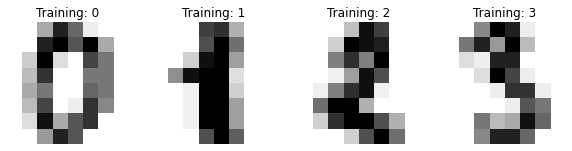

In [3]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [4]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

[ 0.  0.  1. 11. 14. 15.  3.  0.  0.  1. 13. 16. 12. 16.  8.  0.  0.  8.
 16.  4.  6. 16.  5.  0.  0.  5. 15. 11. 13. 14.  0.  0.  0.  0.  2. 12.
 16. 13.  0.  0.  0.  0.  0. 13. 16. 16.  6.  0.  0.  0.  0. 16. 16. 16.
  7.  0.  0.  0.  0. 11. 13. 12.  1.  0.]


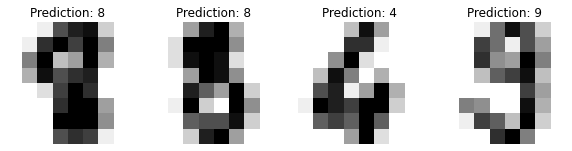

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [6]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


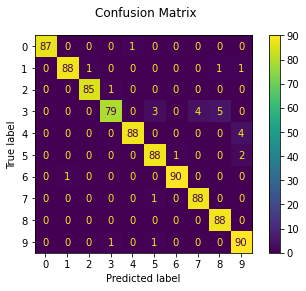

In [7]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Chụp ảnh bằng webcam máy tính

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## thử nghiệm model trên các bức ảnh tự chụp

In [9]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

In [10]:
#giá trị thực y_test
y_test_data = np.array([0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9])

In [11]:
#hàm cắt hình ảnh
def crop_img(img):

    img = 255 - img[:, :]
    top= img.shape[0]//2
    bottom = img.shape[0]//2
    left = img.shape[1]//2
    right = img.shape[1]//2

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] > 160:
                if top>= i: top= i
                if left >= j: left = j
                if bottom <= i: bottom = i
                if right <= j: right = j

    img = img[top + 2:bottom + 2, left + 2:right + 2] 
    return img

In [12]:
#tạo danh sách kết quả
y_predict_data = []
# lấy kết quả thi chạy model trên 30 bức ảnh
for i in range(1,4):
    for j in range (10):
        path_img = "image/" + str(i) + "_" + str(j) + ".jpg" #lấy đường dẫn hình ảnh
        print(path_img) # hiển thị tên ảnh được đọc
        gray_image = cv2.imread(path_img, 0) #đọc hình và chuyển về ảnh trắng đen
        # cắt hình ảnh
        cropImg = crop_img(gray_image)
        # sửa ảnh về dạng 8x
        resizeImg =  cv2.resize(cropImg,(8,8))
        
        input = resizeImg/16
        predict_input_data = clf.predict(input.reshape(1,64))
        y_predict_data.append(predict_input_data[0])
y_predict_data = np.array(y_predict_data)

# in ra kết quả sau khi test
y_predict_data

image/1_0.jpg
image/1_1.jpg
image/1_2.jpg
image/1_3.jpg
image/1_4.jpg
image/1_5.jpg
image/1_6.jpg
image/1_7.jpg
image/1_8.jpg
image/1_9.jpg
image/2_0.jpg
image/2_1.jpg
image/2_2.jpg
image/2_3.jpg
image/2_4.jpg
image/2_5.jpg
image/2_6.jpg
image/2_7.jpg
image/2_8.jpg
image/2_9.jpg
image/3_0.jpg
image/3_1.jpg
image/3_2.jpg
image/3_3.jpg
image/3_4.jpg
image/3_5.jpg
image/3_6.jpg
image/3_7.jpg
image/3_8.jpg
image/3_9.jpg


array([5, 1, 2, 9, 3, 5, 5, 7, 9, 9, 5, 5, 2, 3, 9, 5, 2, 9, 1, 9, 2, 5,
       5, 5, 2, 9, 5, 5, 9, 9])

In [13]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test_data, y_predict_data)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      0.33      0.40         3
           2       0.40      0.67      0.50         3
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         3
           5       0.18      0.67      0.29         3
           6       0.00      0.00      0.00         3
           7       1.00      0.33      0.50         3
           8       0.00      0.00      0.00         3
           9       0.33      1.00      0.50         3

    accuracy                           0.33        30
   macro avg       0.29      0.33      0.26        30
weighted avg       0.29      0.33      0.26        30




C:\Users\Truon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Truon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Truon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Confusion matrix:
[[0 0 1 0 0 2 0 0 0 0]
 [0 1 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 1]
 [0 0 1 1 0 0 0 0 0 1]
 [0 0 0 0 0 2 0 0 0 1]
 [0 0 1 0 0 2 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 1]
 [0 1 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 3]]


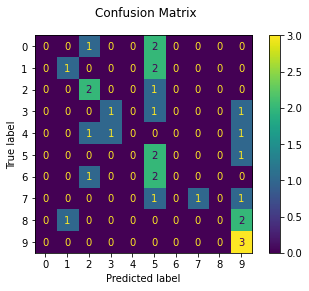

In [14]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_data, y_predict_data)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Hiển thị ra 1 số kết quả

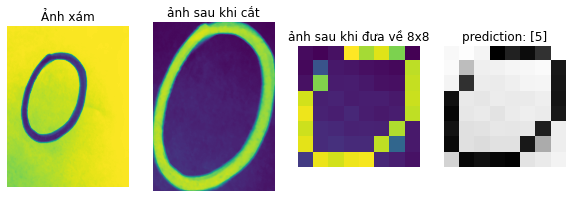

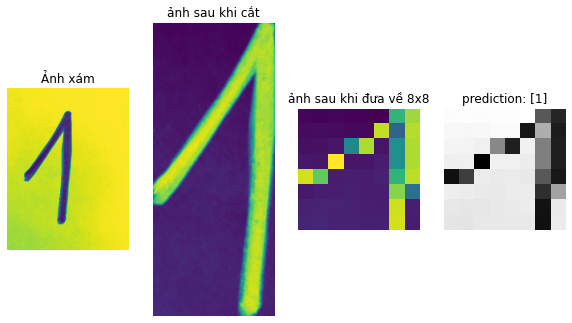

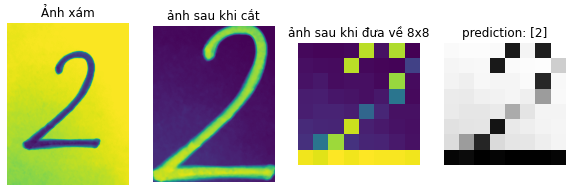

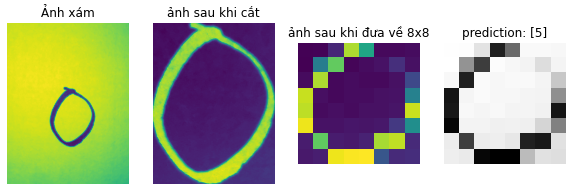

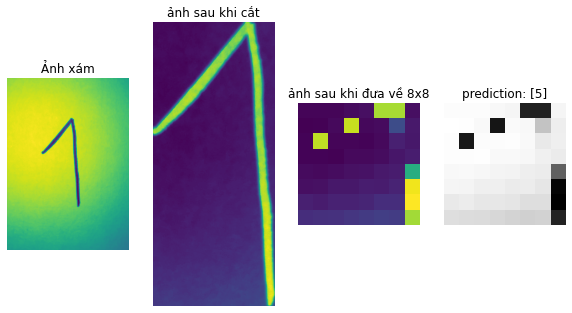

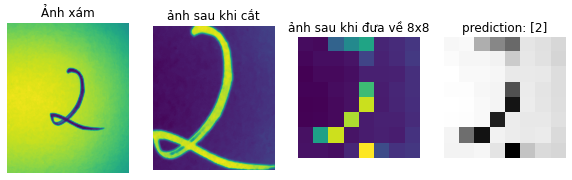

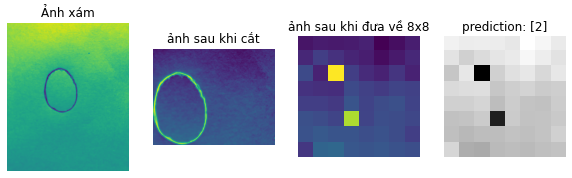

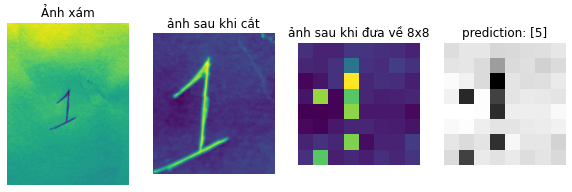

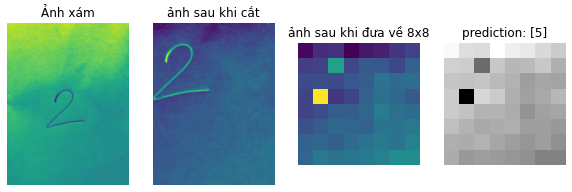

In [15]:
for i in range(1,4):
    for j in range (3):
        path_img = "image/" + str(i) + "_" + str(j) + ".jpg" #lấy đường dẫn hình ảnh
        gray_image = cv2.imread(path_img, 0) #đọc hình và chuyển về ảnh trắng đen
        # cắt hình ảnh
        cropImg = crop_img(gray_image)
        # sửa ảnh về dạng 8x
        resizeImg =  cv2.resize(cropImg,(8,8))

        # chạy model với ảnh 
        input = resizeImg/16
        predict_input_data = clf.predict(input.reshape(1,64))

        #hiển thị hình ảnh đã test
        fig = plt.figure(figsize=(10, 7))
         
        # hiển thị ảnh xám
        fig.add_subplot(1, 4, 1)
        plt.imshow(gray_image)
        plt.axis('off')
        plt.title("Ảnh xám")
        
        # hiển thị ảnh sau khi cắt
        fig.add_subplot(1, 4, 2)
        plt.imshow(cropImg)
        plt.axis('off')
        plt.title("ảnh sau khi cắt")
        
        # hiển thị ảnh sau khi đưa về 8x8
        fig.add_subplot(1, 4, 3)
        
        plt.imshow(resizeImg)
        plt.axis('off')
        plt.title("ảnh sau khi đưa về 8x8")

        # hiển thị hình ảnh với kết quả model cho ra
        fig.add_subplot(1, 4, 4)
        plt.imshow(resizeImg, cmap=plt.cm.gray_r)
        plt.axis('off')
        plt.title("prediction: " + str(predict_input_data))
        